In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/home/akeemlag/Downloads/heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


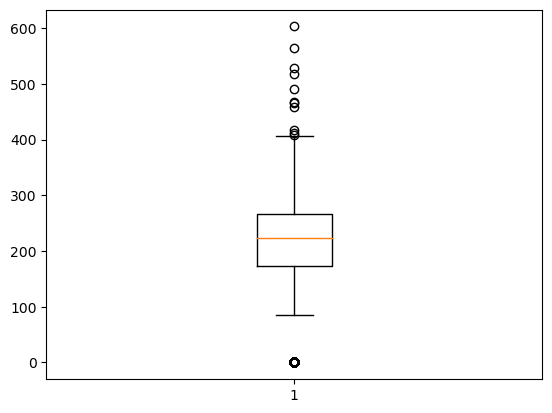

In [4]:
# plt.boxplot(df['MaxHR'])
plt.boxplot(df['Cholesterol']);

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# Remove outliers using zscore
mean = df.Cholesterol.mean()
std_cho = df.Cholesterol.std()

In [7]:
# Add a zscore column to dataframe
df['zscore'] = (df.Cholesterol - mean)/std_cho

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736


In [8]:
# Remove outliers using zscore
df_no_outlier = df[(df.zscore>-3) & (df.zscore<3)]

df_no_outlier

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0.596068
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,-0.053020
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,-0.619830
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.340090


In [9]:
# Convert the Sex column and RestingECG to numbers 

le = LabelEncoder()

In [10]:
df_no_outlier.Sex = le.fit_transform(df_no_outlier.Sex)
df_no_outlier.ChestPainType = le.fit_transform(df_no_outlier.ChestPainType)
df_no_outlier.loc[:, 'ST_Slope'] = le.fit_transform(df_no_outlier.ST_Slope)

/tmp/ipykernel_5387/3203031589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.Sex = le.fit_transform(df_no_outlier.Sex)
/tmp/ipykernel_5387/3203031589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.ChestPainType = le.fit_transform(df_no_outlier.ChestPainType)


In [11]:
df_no_outlier.loc[:, 'ExerciseAngina'] = le.fit_transform(df_no_outlier.ExerciseAngina)

In [12]:
df_no_outlier.RestingECG = le.fit_transform(df_no_outlier.RestingECG)

/tmp/ipykernel_5387/2099090577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier.RestingECG = le.fit_transform(df_no_outlier.RestingECG)


In [13]:
df_no_outlier

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0.824621
1,49,0,2,160,180,0,1,156,0,1.0,1,1,-0.171867
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0.769768
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0.138964
4,54,1,2,150,195,0,1,122,0,0.0,2,0,-0.034736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,0.596068
914,68,1,0,144,193,1,1,141,0,3.4,1,1,-0.053020
915,57,1,0,130,131,0,1,115,1,1.2,1,1,-0.619830
916,57,0,1,130,236,0,0,174,0,0.0,1,1,0.340090


In [14]:
# Create a heatmap to drop columns with higher correlation
df_no_outlier.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore
Age,1.000000,0.060403,-0.081577,0.255156,-0.095336,0.198633,-0.005028,-0.385866,0.216149,0.256671,-0.270011,0.287541,-0.095336
Sex,0.060403,1.000000,-0.123436,0.003667,-0.201031,0.118733,0.068475,-0.187402,0.189440,0.107873,-0.151726,0.303266,-0.201031
ChestPainType,-0.081577,-0.123436,1.000000,-0.020199,0.070659,-0.071529,-0.070539,0.287845,-0.354354,-0.179355,0.213757,-0.384901,0.070659
RestingBP,0.255156,0.003667,-0.020199,1.000000,0.109558,0.069624,0.021111,-0.111653,0.154094,0.165036,-0.076473,0.107594,0.109558
Cholesterol,-0.095336,-0.201031,0.070659,0.109558,1.000000,-0.270089,-0.194856,0.239859,-0.034033,0.051016,0.120346,-0.240136,1.000000
FastingBS,0.198633,0.118733,-0.071529,0.069624,-0.270089,1.000000,0.086385,-0.130492,0.057273,0.052535,-0.175787,0.266366,-0.270089
RestingECG,-0.005028,0.068475,-0.070539,0.021111,-0.194856,0.086385,1.000000,-0.178053,0.076307,-0.019321,-0.007791,0.055613,-0.194856
MaxHR,-0.385866,-0.187402,0.287845,-0.111653,0.239859,-0.130492,-0.178053,1.000000,-0.370029,-0.161743,0.343946,-0.399464,0.239859
ExerciseAngina,0.216149,0.189440,-0.354354,0.154094,-0.034033,0.057273,0.076307,-0.370029,1.000000,0.409354,-0.429901,0.494432,-0.034033
Oldpeak,0.256671,0.107873,-0.179355,0.165036,0.051016,0.052535,-0.019321,-0.161743,0.409354,1.000000,-0.502567,0.406359,0.051016


<AxesSubplot: >

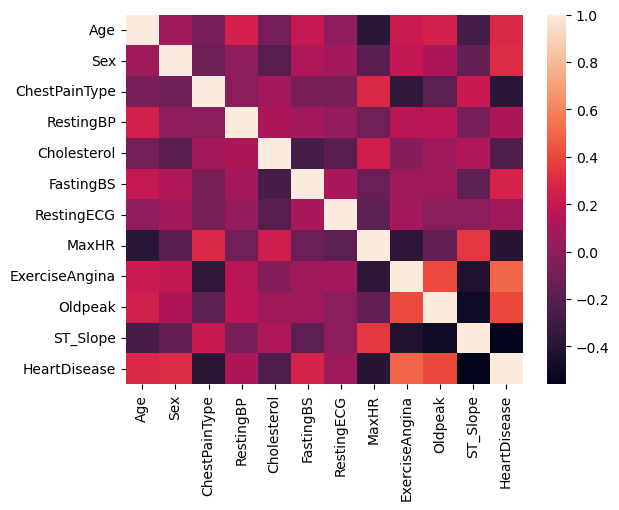

In [15]:
sns.heatmap(df_no_outlier.drop('zscore', axis=1).corr())

In [16]:
X = df_no_outlier.drop(['zscore', 'HeartDisease'], axis=1)
y = df_no_outlier.HeartDisease

In [17]:
scaler = StandardScaler()

In [18]:
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [20]:
model_params = {
    'SVC': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['linear', 'rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10],
            'max_depth': [10, 20, 30]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'solver': ['liblinear', 'lbfgs'],
            'C': [1, 5, 10]
        }
    },
    'gausian_nb': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [10,20, 30],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,6,12]
        }
    }
}

In [21]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model_name': model_name,
        'best_params': clf.best_params_,
        'best_score': clf.best_score_
    })

/usr/lib/python3/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [22]:
pd.DataFrame(scores, columns=['model_name', 'best_params', 'best_score'])

,model_name,best_params,best_score
0,SVC,"{'C': 10, 'kernel': 'rbf'}",0.866052


In [23]:
# Use PCA to reduce dimensions
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.58774387,  29.20177371],
       [-15.84751559,  13.62725247],
       [ 83.00473757, -38.34426209],
       ...,
       [-67.84637419, -17.25464049],
       [ 40.47616969,  33.45395505],
       [-20.14248475,  37.17207916]])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, random_state=42)

In [26]:
model_svm = SVC(kernel='linear', C=5)
model_svm.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [27]:
model_svm.score(X_test, y_test)

0.8415300546448088

In [48]:
model_rf = RandomForestClassifier(n_estimators=15, max_depth=15)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=15)

In [49]:
model_rf.score(X_test, y_test)

0.8524590163934426